In [143]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os, sys
import cv2
import skimage.exposure
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
PATH = '/home/eddyod/programming/pipeline_utility'
sys.path.append(PATH)
from utilities.utilities_mask import fix_thionin, fix_thionin_debug

In [145]:
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/MD589'
INPUT = os.path.join(DIR, 'preps', 'CH1', 'thumbnail')
CLEANED = os.path.join(DIR, 'preps', 'CH1', 'thumbnail_cleaned')
MASKED = os.path.join(DIR, 'preps', 'thumbnail_masked')
files = sorted(os.listdir(INPUT))

In [7]:
def merge_fix(infile, mask):
    imgfull = cv2.imread(infile)
    img_ch1 = imgfull[:, :, 0]
    img_ch2 = imgfull[:, :, 1]
    img_ch3 = imgfull[:, :, 2]
    fixed1 = cv2.bitwise_and(img_ch1, img_ch1, mask=mask)
    fixed2 = cv2.bitwise_and(img_ch2, img_ch2, mask=mask)
    fixed3 = cv2.bitwise_and(img_ch3, img_ch3, mask=mask)
    fixed = np.dstack((fixed1, fixed2, fixed3))
    return fixed


100%|██████████| 1/1 [00:00<00:00, 15.62it/s]


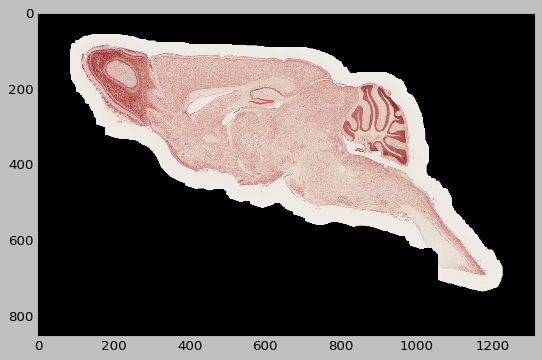

In [247]:
##### get oriented for comparison
img_inputs = []
img_outputs = []
file_inputs = []
titles = []
masks = []

for i, file in enumerate(tqdm(files[189:190])):
    infile = os.path.join(INPUT, file)
    src = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
    mask = fix_thionin_debug(src)
    fixed = merge_fix(infile, mask)
    img_inputs.append(src)    
    file_inputs.append(file)        
    masks.append(mask)
    img_outputs.append(fixed)
    
plt.imshow(img_outputs[0])
plt.show()

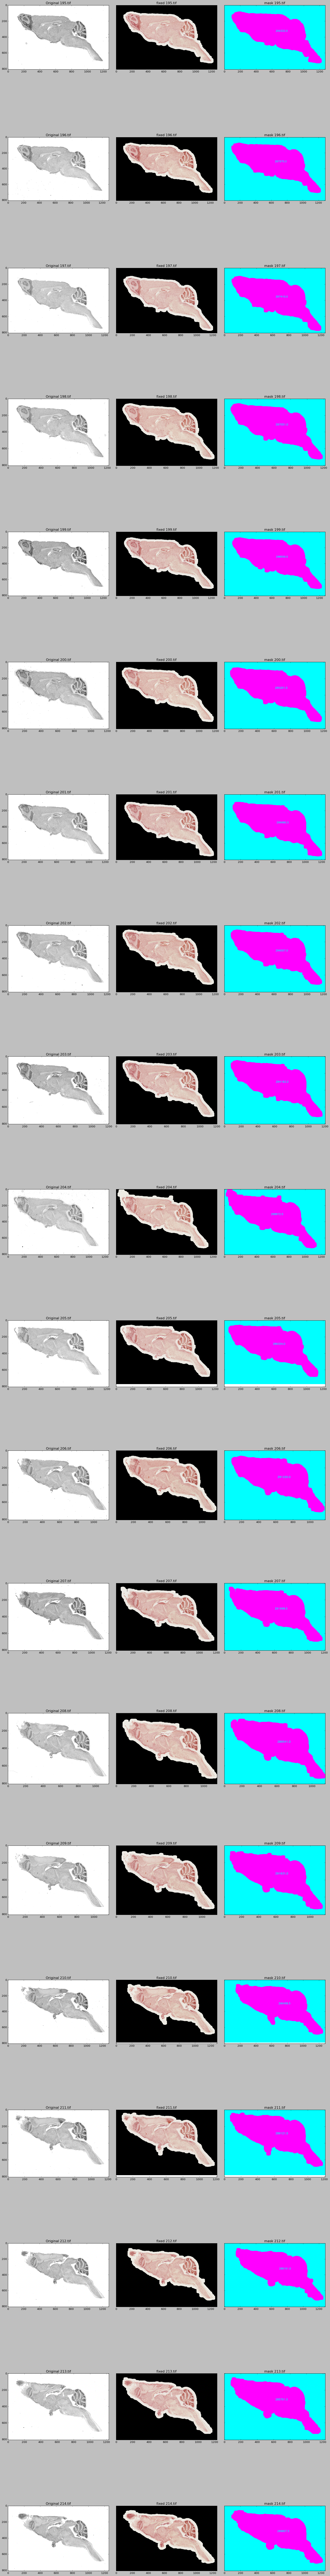

In [213]:
start, finish = (0,20)
#displays = masks[start:finish]
dins = img_inputs[start:finish]
douts = img_outputs[start:finish]
dmasks = masks[start:finish]
names = file_inputs[start:finish]

fig, ax = plt.subplots(nrows=len(names), ncols=3, sharex=False, sharey=True)
plt.style.use('classic')
i = 0
for filein, fileout, mask, name in zip(dins, douts, dmasks, names):
    ax[i,0].set_title('Original {}'.format(name))
    ax[i,0].imshow(filein, cmap="gray")
    ax[i,1].set_title('fixed {}'.format(name))
    ax[i,1].imshow(fileout, cmap="gray")
    ax[i,2].set_title('mask {}'.format(name))
    ax[i,2].imshow(mask, cmap="cool")

    i += 1
# swap the 10 and the six below if the images are wider than height
fig.set_size_inches(np.array([20, 8 * len(names)]), forward=False)
plt.tight_layout()
plt.show()